In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
bitCoin_ds=pd.read_csv("./dataset/bitcoin.csv")

In [3]:
bitCoin_ds.head()

,Date,Open,High,Low,Close,Vol.
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K


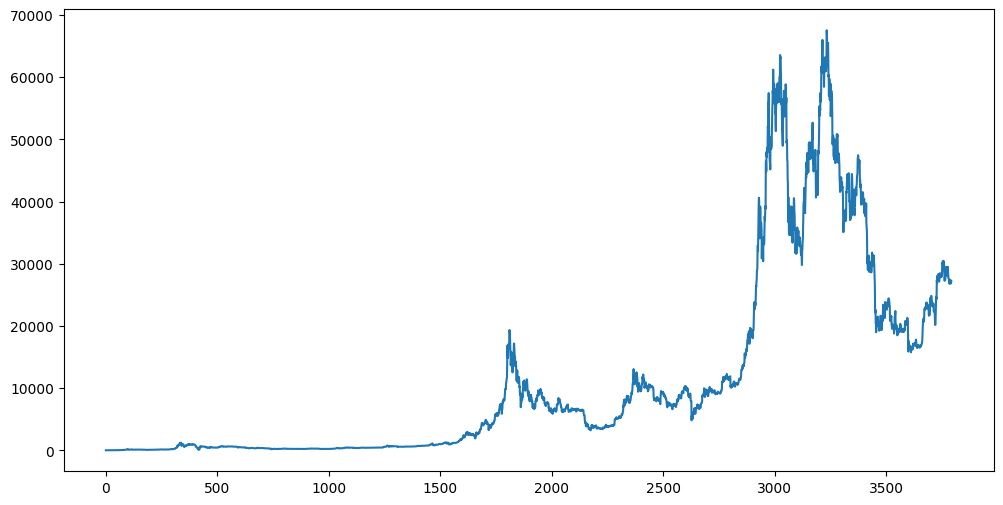

In [6]:
plt.close()
plt.figure(figsize=(12,6))
plt.plot(bitCoin_ds['Close'])
plt.show()

In [7]:
bitCoin_ds.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
Vol.     0
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_13704\1366776887.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
C:\Users\hp\AppData\Local\Temp\ipykernel_13704\1366776887.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(bitCoin_ds[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_13704\1366776887.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

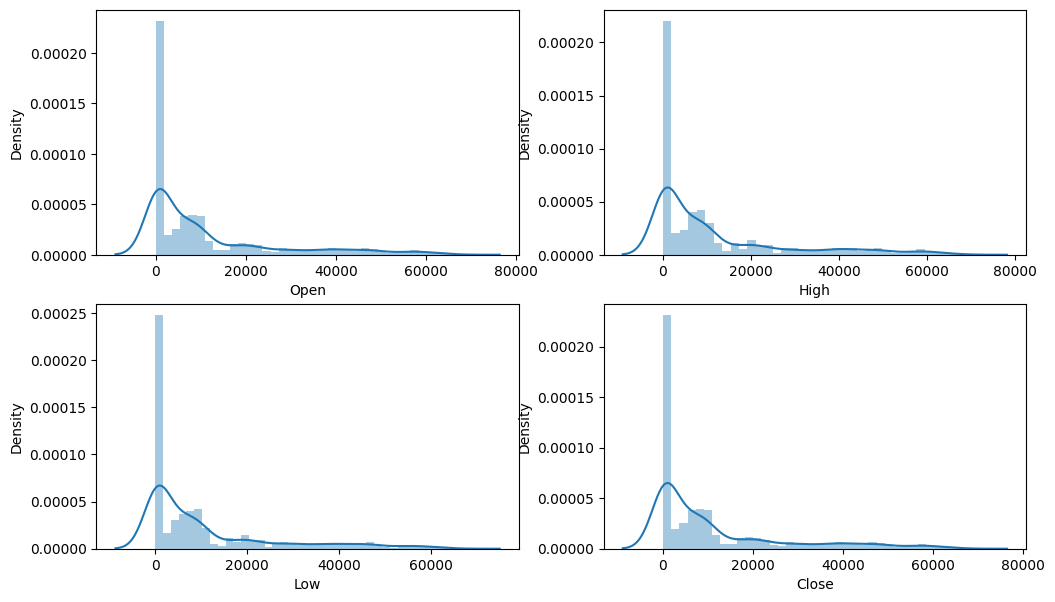

In [13]:
features = ['Open', 'High', 'Low', 'Close']
plt.close()
plt.subplots(figsize=(12,7))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(bitCoin_ds[col])
plt.show()

In [15]:
a="Farzaneh-Valaee"
b=np.array(a.split("-"))

'Farzaneh'

In [54]:
date=bitCoin_ds["Date"].str.split("-", expand=True)


In [55]:
bitCoin_ds['Year']=date[0].astype('int')
bitCoin_ds['Month']=date[1].astype('int')
bitCoin_ds['Day']=date[2].astype('int')
# bitCoin_ds['Year']
# bitCoin_ds['Month']
# bitCoin_ds['Day']

In [56]:
bitCoin_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3793 non-null   object 
 1   Open    3793 non-null   float64
 2   High    3793 non-null   float64
 3   Low     3793 non-null   float64
 4   Close   3793 non-null   float64
 5   Vol.    3793 non-null   object 
 6   Year    3793 non-null   int32  
 7   Month   3793 non-null   int32  
 8   Day     3793 non-null   int32  
dtypes: float64(4), int32(3), object(2)
memory usage: 222.4+ KB


In [61]:
bitCoin_ds.describe()

,Open,High,Low,Close,Year,Month,Day
count,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766,2017.704719,6.387820,15.695228
std,15421.568722,15827.119004,14960.319732,15422.533996,3.004361,3.464121,8.791503
min,13.300000,13.400000,13.200000,13.300000,2013.000000,1.000000,1.000000
25%,450.300000,459.600000,441.900000,451.400000,2015.000000,3.000000,8.000000
50%,5208.300000,5322.900000,5033.700000,5209.100000,2018.000000,6.000000,16.000000
75%,14976.200000,15648.300000,13902.300000,15043.000000,2020.000000,9.000000,23.000000
max,67528.700000,68990.600000,66334.900000,67527.900000,2023.000000,12.000000,31.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_13704\3184202288.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


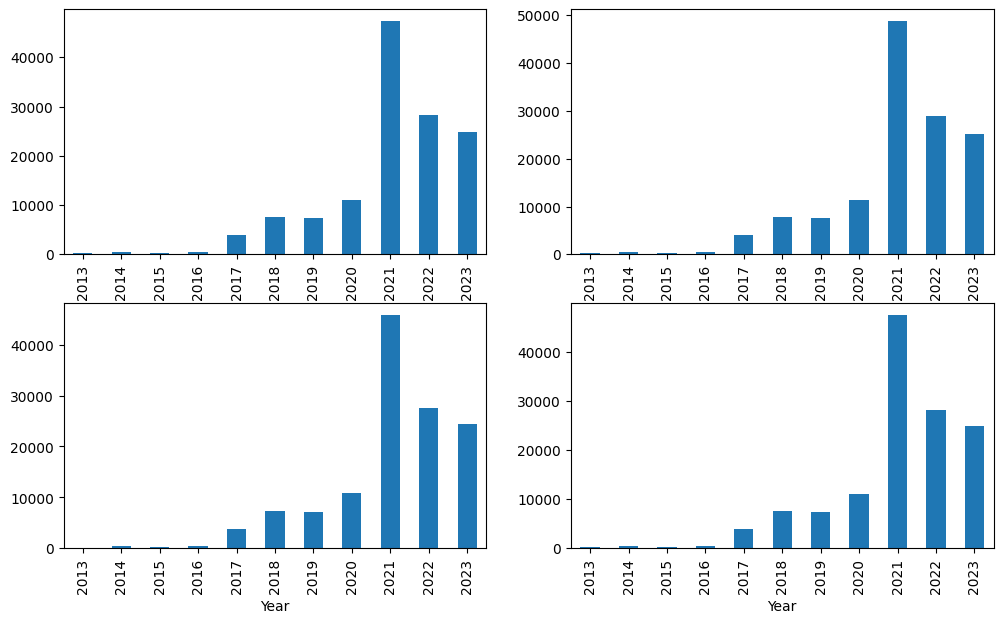

In [71]:
plt.close()
data_grouped = bitCoin_ds.groupby('Year').mean(numeric_only=True)
plt.subplots(figsize=(12,7))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [76]:
bitCoin_ds['is_quarter_end']=np.where(bitCoin_ds['Month']%3==0,1,0)

In [77]:
bitCoin_ds.describe()

,Open,High,Low,Close,Year,Month,Day,is_quarter_end
count,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766,2017.704719,6.387820,15.695228,0.329818
std,15421.568722,15827.119004,14960.319732,15422.533996,3.004361,3.464121,8.791503,0.470209
min,13.300000,13.400000,13.200000,13.300000,2013.000000,1.000000,1.000000,0.000000
25%,450.300000,459.600000,441.900000,451.400000,2015.000000,3.000000,8.000000,0.000000
50%,5208.300000,5322.900000,5033.700000,5209.100000,2018.000000,6.000000,16.000000,0.000000
75%,14976.200000,15648.300000,13902.300000,15043.000000,2020.000000,9.000000,23.000000,1.000000
max,67528.700000,68990.600000,66334.900000,67527.900000,2023.000000,12.000000,31.000000,1.000000


In [79]:
bitCoin_ds['open-close']  = bitCoin_ds['Open'] - bitCoin_ds['Close']
bitCoin_ds['low-high']  = bitCoin_ds['Low'] - bitCoin_ds['High']
bitCoin_ds['target'] = np.where(bitCoin_ds['Close'].shift(-1) > bitCoin_ds['Close'], 1, 0)
bitCoin_ds

,Date,Open,High,Low,Close,Vol.,Year,Month,Day,is_quarter_end,open-close,low-high,target
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,2013,1,1,0,0.2,-0.4,0
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,2013,1,2,0,0.0,-0.2,1
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,2013,1,3,0,-0.1,-0.2,1
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,2013,1,4,0,-0.1,-0.2,0
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,2013,1,5,0,0.1,-0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,2023-05-17,27035.5,27465.3,26597.7,27403.1,58.14K,2023,5,17,0,-367.6,-867.6,0
3789,2023-05-18,27403.8,27467.0,26449.8,26828.0,63.39K,2023,5,18,0,575.8,-1017.2,1
3790,2023-05-19,26828.2,27154.7,26711.3,26882.9,36.67K,2023,5,19,0,-54.7,-443.4,1
3791,2023-05-20,26883.0,27147.2,26831.3,27116.2,17.72K,2023,5,20,0,-233.2,-315.9,1


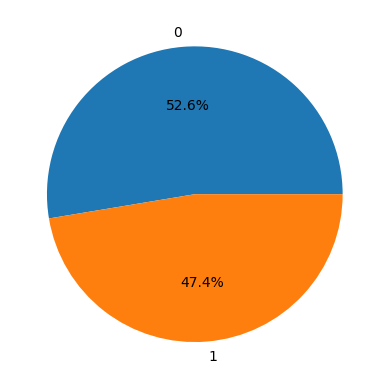

In [82]:
plt.close()
plt.pie(bitCoin_ds['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [84]:
features = bitCoin_ds[['open-close', 'low-high', 'is_quarter_end']]
target = bitCoin_ds['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.15, random_state=2022)
print(X_train.shape, X_valid.shape)

(3224, 3) (569, 3)


In [85]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
  models[i].max_iter=10000
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression(max_iter=10000) : 
Training Accuracy :  0.5332730775570201
Validation Accuracy :  0.5417666707905481

DecisionTreeClassifier() : 
Training Accuracy :  0.9999905428153768
Validation Accuracy :  0.5196214276877397

KNeighborsClassifier() : 
Training Accuracy :  0.7345734983438347
Validation Accuracy :  0.5565136706668317

